# Lab Statement
This lab examines the multivariate relationship between random variables in a randomly generated dataset through using Linear Regression Data Analysis.

<img src='images/std_dev.png' width =400, height = 400>

# Objectives
- Create a professional looking Jupyter Notebook
- Create and use Machine Learning Models with SciKit Learn
- Learn how to generate data using SciKitLearn
- Use Python inline Lamda to create a function to model the data
- Learn more advanced NumPy (Numerical Python) array features
- Perform Multiple Regression Analysis with SciKitLearn
    - Train/Test Split with SciKitLearn
- Create and Test Predictive Models
- Perform Model Evaluation
    - Model Score and Accuracy
- Perform 3D Plotting with MatPlotLib

# Introduction
In the previous labs we fitted a line to a dataset, which is a linear regression problem. These labs used simple linear regressionn with a single input feature (single variable) to predict the outcome of a dependent variable.  If we are dealing with data that has a higher number of dimensions, how do we go about creating a linear regression solution? Scikit-learn has a large number of tools to do this, such as Lasso and Ridge Regression. For now, we will stick with the ordinary Least Squares Regression function.

# Creating the Predictive Model

### Importing the Essentials

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression

### Generate Random Data from SciKitLearn Samples Generator

In [11]:
X,y = make_regression(n_samples = 100, n_features = 2, n_informative = 1, random_state = 0, noise = 50)
#print(X,y)

**X** and **y** are the values for the 3D space in the graph seen later on. We first need to train the Machine Learning model, so we will split X and y into **X_train, X_test, y_train, and y_test** so that the training data will be given to the model to train it. It will consist of 80 instances.

### Splitting the Dataset

In [17]:
X_train, X_test = X[:80], X[-20:]
y_train, y_test = y[:80], y[-20:]

#Check to see if the split went well
print (X_train.shape)
print (X_test.shape)

(80, 2)
(20, 2)


The format of *X[:n]* means that the data in the Training Set will have **values 0 to 80,** and *X[-n:]* means that the Testing Set will start at **20 rows from the end and have all the data up until the end of the dataset.**

### Creating the Instance of the Model

In [19]:
regr = linear_model.LinearRegression()

### Training the Model

In [20]:
regr.fit(X_train, y_train)

LinearRegression()

### Printing the Coefficients

In [21]:
print(regr.coef_)

[-10.25691752  90.5463984 ]


# Model Evaluation: Making Predictions and Scoring the Model

### Predicting the Value of "y" Based on Training

In [22]:
X1=np.array([1.2, 4])

### Reshaping the Array so NumPy can use it

In [24]:
X1 = np.reshape(X1, (1,-1))

### Printing the Results

In [25]:
print(regr.predict(X1))
print(regr.score(X_test, y_test))

[350.86036386]
0.9498274922607957


Because the Regression Score (Accuracy) is so high, we know that this model is very accurate. This is to be expected because we had relatively clean data to work with from the beginning.

# Creating 3D Plots with MatPlotLib

### Define the Inline Function (Lambda)
First, we need to define an **Inline Function** by using Lambda with the coefficient variables (weights) that were returned from the regression analysis

In [26]:
coef = regr.coef_
line = lambda x1, x2: coef[0]*x1 + coef[1]*x2

### Plotting the Training Set, Testing Set, and Sheet of Best Fit on a 3D Graph

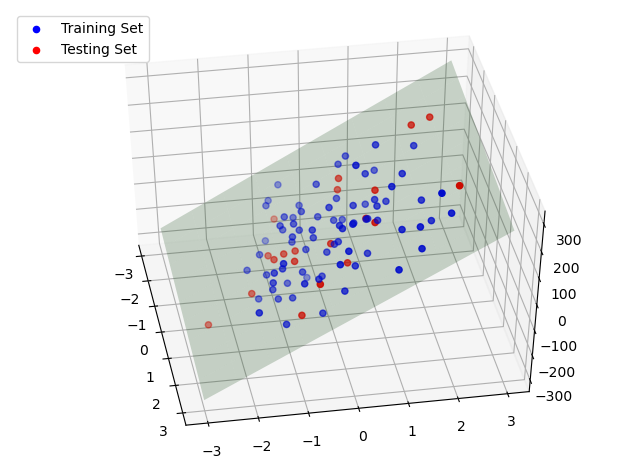

In [56]:
#Establish Figure Size
fig = plt.figure(figsize = (8,6), dpi = 100)
grid_x1, grid_x2 = np.mgrid[-3:3:10j, -3:3:10j]

#Add Subplot to make Graph 3D
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')

#Establishing the Information on the Graph
ax.scatter(X_train[:,0], X_train[:,1], y_train, facecolor='blue', label = 'Training Set')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='red', label = "Testing Set")
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2), alpha=0.2, color='green')

#Changing the Viewing Angle
ax.view_init(45, -10)

#Legend
plt.legend(loc="upper left")

### Saving the Plot as a PDF File

In [57]:
fig.savefig('MR_Lab_2.pdf')

# Final Thoughts
- As said earlier in the lab, the accuracy of the model was 94.98%, thus indicating that it was a very accurate model. This is because the data we generated was fake and relatively clean; however, data in the real world doesn't play as nicely.
- When working with 3D graphs, getting the right viewing angle is essential for understanding what is going on. This is where the **ax.view_init(m, n)** command comes in handy...
    - **m** represents the elevation (elev), which stores the elevation angle in the z plane
    - **n** represents the azimuth (azim), which stores the azimuth angle in the x and y planes
- The creation of a 3D graph is because there are multiple inputs being included in this analysis. This is why a "Sheet" of Best Fit is produced instead of a single line.
- The **LinearRegression()** function can work with much higher dimensions, so dealing with a larger number of inputs in a model is relatively straight forward. However, there are other linear regression models that should be looked into when looking at other datasets.